In [925]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [926]:
df = pd.read_csv("1959_1963.csv")
df.tail()

,Date,Valeur,Source
43665,31/12/1963 19:00:00,5.05,4
43666,31/12/1963 20:00:00,3.70,4
43667,31/12/1963 21:00:00,2.40,4
43668,31/12/1963 22:00:00,1.34,4
43669,31/12/1963 23:00:00,0.95,4


In [927]:
total = (4 * 365 + 366)*24
print(f'Amount of hours missing : {total - len(df)}')

Amount of hours missing : 154


In [928]:
df.Date = pd.to_datetime(df.Date, format = '%d/%m/%Y %H:%M:%S')
df.insert(1, 'Date1', df.Date.shift(periods=-1))
df.insert(2, 'Diff', (df.Date1 - df.Date))
df['Diff']

0       0 days 01:00:00
1       0 days 01:00:00
2       0 days 01:00:00
3       0 days 01:00:00
4       0 days 01:00:00
              ...      
43665   0 days 01:00:00
43666   0 days 01:00:00
43667   0 days 01:00:00
43668   0 days 01:00:00
43669               NaT
Name: Diff, Length: 43670, dtype: timedelta64[ns]

In [929]:
df1 = df[df.Diff > timedelta(hours = 1)]
print(f'Total missing hours found : {(df1.Diff.sum() - timedelta(hours = len(df1))).total_seconds()/3600}')
print(min(df1.Date), max(df1.Date))
df1.head()

Total missing hours found : 154.0
1961-02-18 23:00:00 1963-12-22 22:00:00


,Date,Date1,Diff,Valeur,Source
18719,1961-02-18 23:00:00,1961-02-19 20:00:00,0 days 21:00:00,1.80,4
18723,1961-02-19 23:00:00,1961-02-20 01:00:00,0 days 02:00:00,3.38,4
19153,1961-03-09 22:00:00,1961-03-10 00:00:00,0 days 02:00:00,5.36,4
19392,1961-03-19 22:00:00,1961-03-20 00:00:00,0 days 02:00:00,2.68,4
19487,1961-03-23 22:00:00,1961-03-24 00:00:00,0 days 02:00:00,5.04,4


In [930]:
idx = pd.date_range(start = min(df.Date), end = max(df.Date), freq='H')
df = df.set_index('Date').reindex(idx).rename_axis('Date').reset_index()

df['7dayMean'] = df.Valeur.rolling(window = 7, center = True, min_periods=1).mean()
df['30dayMean'] = df.Valeur.rolling(window = 30, center = True, min_periods=1).mean()
df['200dayMean'] = df.Valeur.rolling(window = 200, center = True, min_periods=1).mean()

df.head(8)
type(df.iloc[18720, 3]) == np.nan, df.iloc[18720] 

(False,
 Date          1961-02-19 00:00:00
 Date1                         NaT
 Diff                          NaT
 Valeur                        NaN
 Source                        NaN
 7dayMean                 3.253333
 30dayMean                3.680667
 200dayMean               4.012346
 Name: 18720, dtype: object)

In [931]:
df7 = df.copy()
df7.Valeur.fillna(df7['7dayMean'], inplace = True)
df7.drop(columns=['Date1', 'Diff', '7dayMean', '30dayMean', '200dayMean'],inplace = True)

df30 = df.copy()
df30.Valeur.fillna(df30['30dayMean'], inplace = True)
df30.drop(columns=['Date1', 'Diff', '7dayMean', '30dayMean', '200dayMean'],inplace = True)

df200 = df.copy()
df200.Valeur.fillna(df200['200dayMean'], inplace = True)
df200.drop(columns=['Date1', 'Diff', '7dayMean', '30dayMean', '200dayMean'],inplace = True)


df30.iloc[18723], df200.iloc[18723], df7.iloc[18723]

(Date      1961-02-19 03:00:00
 Valeur                 3.8775
 Source                    NaN
 Name: 18723, dtype: object,
 Date      1961-02-19 03:00:00
 Valeur               4.038939
 Source                    NaN
 Name: 18723, dtype: object,
 Date      1961-02-19 03:00:00
 Valeur                    NaN
 Source                    NaN
 Name: 18723, dtype: object)

In [932]:
df11 = df7[df7.Valeur.isna()]
df12 = df30[df30.Valeur.isna()]
df13 = df200[df200.Valeur.isna()]



len(df11), len(df12), len(df13)

(24, 0, 0)

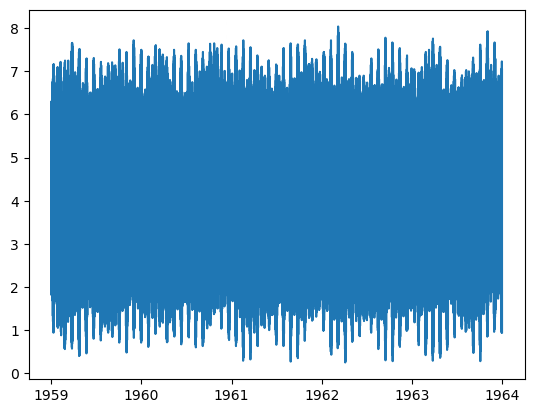

In [954]:
fig, ax = plt.subplots()

ax.plot(df7.Date, df7.Valeur)
#ax.plot(df30.Date, df30.Valeur)